Accuracy: 1.0


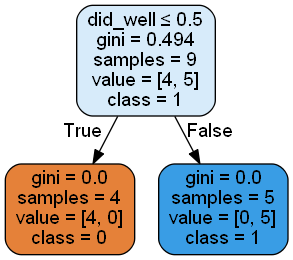

In [11]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics
import graphviz

#  level     lang     tweets  phd  did_well
class Candidate(object):
    #level : str lang : str tweets : bool phd : bool did_well : Optional[bool] = none
    def __init__(self, level, lang, tweets, phd, did_well):
        self.level = level
        self.lang = lang
        self.tweets = tweets
        self.phd = phd
        self.did_well = did_well
        
    def to_dict(self):
        return {
            'level' : self.level,
            'lang' : self.lang,
            'tweets' : self.tweets,
            'phd' : self.phd,
            'did_well' : self.did_well
        }

inputs = [Candidate('Senior', 'Java',   False, False, False),
          Candidate('Senior', 'Java',   False, True,  False),
          Candidate('Mid',    'Python', False, False, True),
          Candidate('Junior', 'Python', False, False, True),
          Candidate('Junior', 'R',      True,  False, True),
          Candidate('Junior', 'R',      True,  True,  False),
          Candidate('Mid',    'R',      True,  True,  True),
          Candidate('Senior', 'Python', False, False, False),
          Candidate('Senior', 'R',      True,  False, True),
          Candidate('Junior', 'Python', True,  False, True),
          Candidate('Senior', 'Python', True,  True,  True),
          Candidate('Mid',    'Python', False, True,  True),
          Candidate('Mid',    'Java',   True,  False, True),
          Candidate('Junior', 'Python', False, True,  False)]

candidate = pd.DataFrame.from_records(i.to_dict() for i in inputs)

# did_well을 판정하는 DecisionTree 그래프

features = candidate[['level', 'lang', 'tweets', 'phd', 'did_well']]
target = candidate["did_well"]

candidate.head()

feature_cols = ['tweets', 'phd', 'did_well']
X = candidate[feature_cols]
y = candidate.did_well

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

clf = DecisionTreeClassifier()
clf = clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

from sklearn.tree import export_graphviz
from six import StringIO  
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('candidate.png')
Image(graph.create_png())